<a href="https://colab.research.google.com/github/Taeyoung90/pytorch_firststep/blob/main/pytorch_first1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
print(torch.__version__)

1.9.0+cu102


In [4]:
X = torch.Tensor(2,3) #2×3 형태의 난수 생성
print(X.shape)

torch.Size([2, 3])


In [5]:
print(X)

tensor([[8.7276e-21, 3.0750e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [6]:
X = torch.tensor([[1,2,3],[4,5,6]])

In [7]:
print(X.shape)
print(X)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [8]:
#기울기를 계산하는 코드 예시
x = torch.tensor(data=[2.0,3.0], requires_grad=True)
y = x**2
z= 2*y +3

target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  # Remove the CWD from sys.path while we load stuff.


x는 leaf node라서 계산되지만, y,z는 leaf node가 아니기 때문에 계산이 안되어 None리턴

### linear regression model 생성, 기울기 계산하여 w,b업데이트

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [14]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1), -10,10)
noise = init.normal_(torch.FloatTensor(num_data,1), std=1) #가우시안 노이즈 평균 0(생략), 표준편차 1
y =2*x + 3
y_noise = 2*(x+noise)+3

1000,1 형태의 tensor 생성후  
init.uniform_() : -10~10 균등하게 초기화  
gaussian 노이즈 추가(표준정규분포를 따르는)

In [11]:
model = nn.Linear(1,1)# 입력 특성수 1, 출력 특성수 1
loss_func = torch.nn.L1Loss()# l1 손실 : 차이절대값 평균

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01) 

최적화할 변수로 model.parameters()를 통해 선형회귀 모델의 변수 w,b 전달

In [15]:
label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad() #각 반복시 지난번에 계산했던 기울기를 0 으로 초기화 > 새로운 가중치와 편차에 대해서 새로운 기술기를 구할 수 있음
  output = model(x)#모델에 x를 전달하여 결과 output에 저장

  loss = loss_func(output, label)
  loss.backward() #변수 w,b에 대한 기울기가 계산
  optimizer.step() #model.parameters()에서 리턴되는 변수들의 

  if i % 1 ==0:
    print(loss.data)
    
param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())

tensor(14.4787)
tensor(14.2341)
tensor(13.9898)
tensor(13.7460)
tensor(13.5027)
tensor(13.2599)
tensor(13.0181)
tensor(12.7771)
tensor(12.5361)
tensor(12.2957)
tensor(12.0561)
tensor(11.8168)
tensor(11.5780)
tensor(11.3404)
tensor(11.1033)
tensor(10.8669)
tensor(10.6311)
tensor(10.3961)
tensor(10.1614)
tensor(9.9273)
tensor(9.6950)
tensor(9.4631)
tensor(9.2321)
tensor(9.0032)
tensor(8.7767)
tensor(8.5518)
tensor(8.3290)
tensor(8.1079)
tensor(7.8879)
tensor(7.6699)
tensor(7.4545)
tensor(7.2414)
tensor(7.0316)
tensor(6.8279)
tensor(6.6281)
tensor(6.4340)
tensor(6.2465)
tensor(6.0661)
tensor(5.8904)
tensor(5.7221)
tensor(5.5595)
tensor(5.4021)
tensor(5.2517)
tensor(5.1131)
tensor(4.9817)
tensor(4.8563)
tensor(4.7431)
tensor(4.6415)
tensor(4.5481)
tensor(4.4657)
tensor(4.3884)
tensor(4.3161)
tensor(4.2479)
tensor(4.1862)
tensor(4.1295)
tensor(4.0818)
tensor(4.0403)
tensor(4.0018)
tensor(3.9659)
tensor(3.9322)
tensor(3.9008)
tensor(3.8733)
tensor(3.8488)
tensor(3.8260)
tensor(3.8048)
tensor

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch =  10000

noise = init.normal_(torch.FloatTensor(num_data,1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15,15)
y = (x**2) +3
y_noise = y+ noise

model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output= model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss)


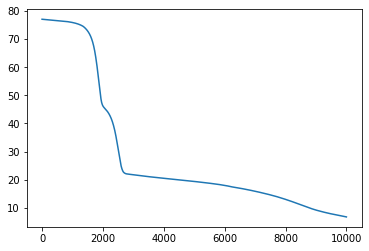

In [18]:
import matplotlib.pyplot as plt


plt.plot(loss_array)
plt.show()